# news recommendation

In [1]:
import pandas as pd

df = pd.read_parquet('data05.parquet')
df["keywords"] = df["keywords"].map(lambda dic: {key: dic[key] for key in dic.keys() if dic[key] is not None and dic[key]["filter"] > 0.1})

In [2]:
df = df.iloc[0, :]
df

aliases                      [Banco Comercial Português, BCP]
news        [{'ExtractedText': 'DN   13 de Setembro de 200...
keywords    {'Angola': {'count': 135, 'date': {'200409': N...
Name: Banco Comercial Português, dtype: object

In [14]:
#df["news"][0]["newsNER"]

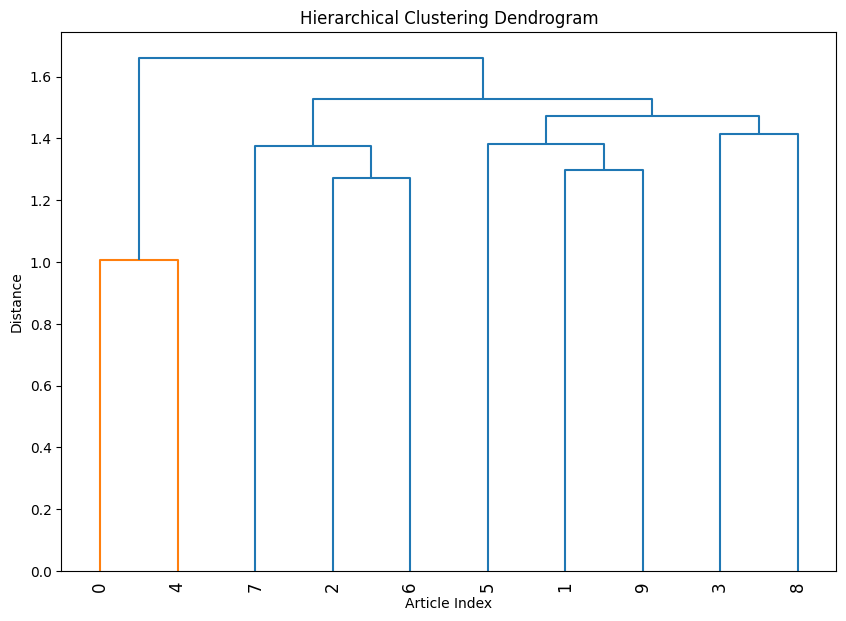

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample articles
articles = [
    "Tecnologia avança rapidamente na inteligência artificial",
    "Esporte: time ganha campeonato nacional",
    "Ciência faz descoberta sobre o universo",
    "Política: eleições e debates atuais",
    "Inteligência artificial e avanços em tecnologia",
    "Campeonato de futebol termina em vitória",
    "Descoberta científica em biotecnologia",
    "Notícias sobre economia global",
    "Viagem espacial e novas fronteiras",
    "Esporte e saúde mental dos atletas"
]

# Step 1: Compute TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(articles)
#print(tfidf_matrix)

# Step 2: Perform hierarchical clustering using 'linkage'
linked = linkage(tfidf_matrix.toarray(), method='ward')
#print(linked)

# Step 3: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=range(0, len(articles)), leaf_rotation=90, leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Article Index')
plt.ylabel('Distance')
plt.show()
